In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('/content/DJI (one column).csv')
#Printing head
df.head()


,Close
0,1292.619995
1,1287.880005
2,1286.770020
3,1277.719971
4,1290.079956


In [ ]:
#Printing tail
df.tail()

,Close
8573,25239.36914
8574,25411.51953
8575,25390.30078
8576,25169.52930
8577,25106.33008


In [ ]:
#Subsetting the dataset
#Index 11856 marks the end of year 2013
#df = pd.read_csv('TimeSeriesTrain.csv', nrows = 11856)

#Creating train and test set 
#Index 10392 marks the end of October 2013

n_row = df.shape[0]
train_n_row = int(n_row * 0.8) 
train=df[0:train_n_row] 
test=df[train_n_row:]

df=df.dropna()
train=train.dropna()
test=test.dropna()


test

,Close
6862,12921.41016
6863,13115.54004
6864,13032.75000
6865,12964.09961
6866,13029.25977
...,...
8573,25239.36914
8574,25411.51953
8575,25390.30078
8576,25169.52930


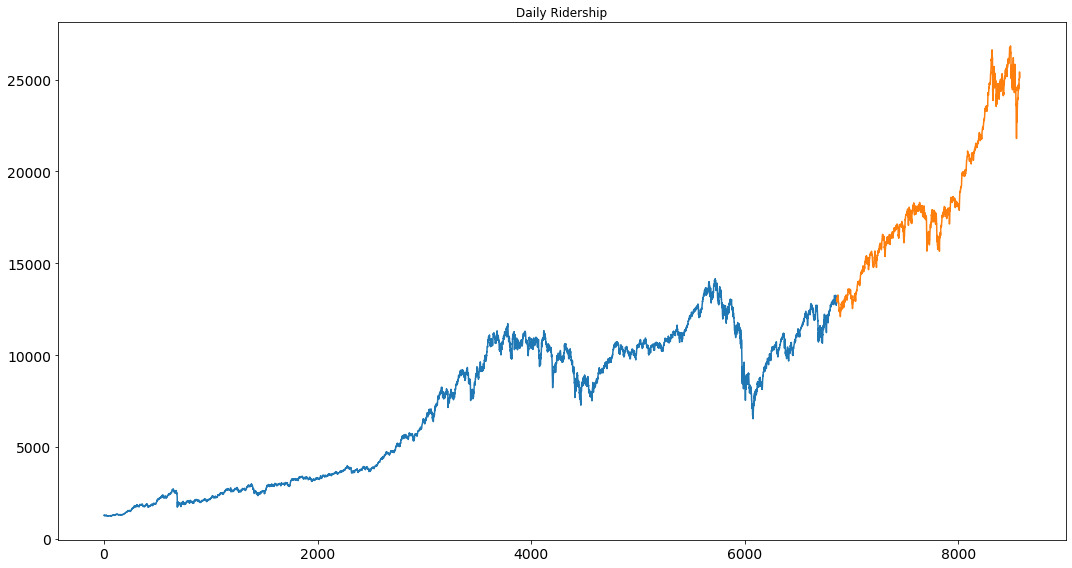

In [ ]:
#Plotting data
train['Close'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test['Close'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.tight_layout()
plt.show()

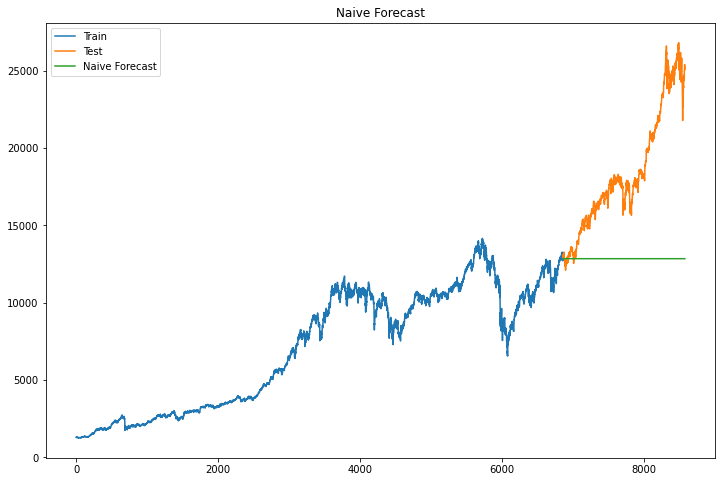

In [ ]:
#this is doing the naive average, only take the previous one, no good
dd= np.asarray(train.Close)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index,test['Close'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Close, y_hat.naive))
print(rms)
#RMSE

6795.273831667608


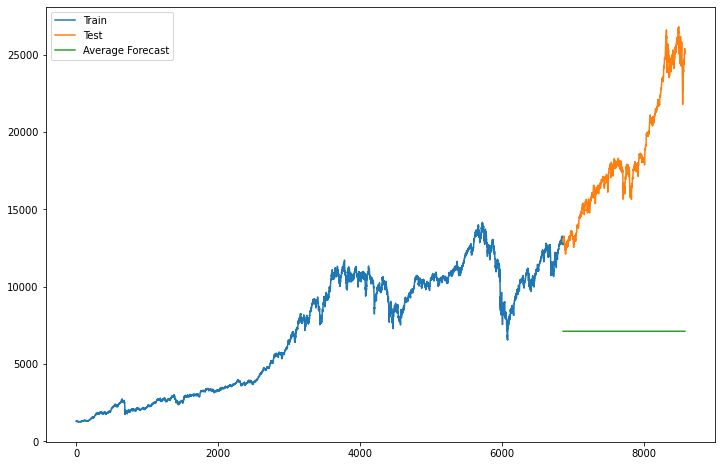

In [ ]:
#this is using the previous whole period, no good
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.avg_forecast))
print(rms)
#这个RMSE是不好的

11977.36879205934


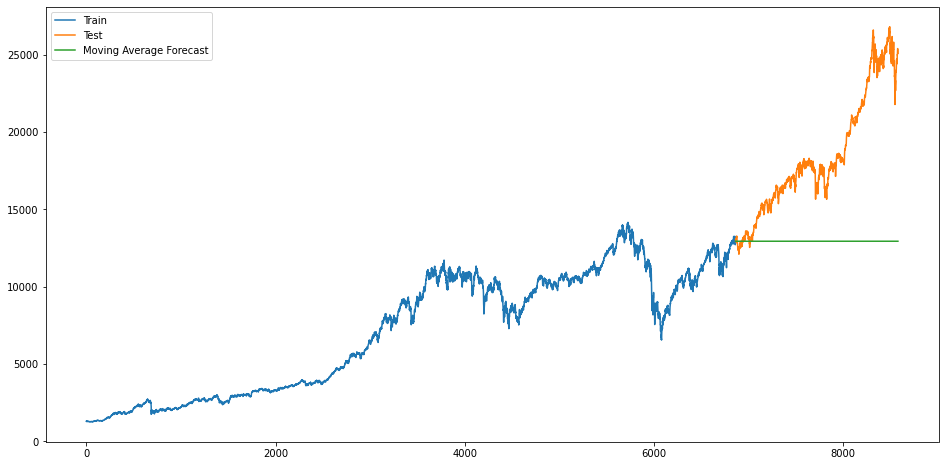

In [ ]:
#这个是moving average
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Close'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.moving_avg_forecast))
print(rms)

6718.153712547126


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


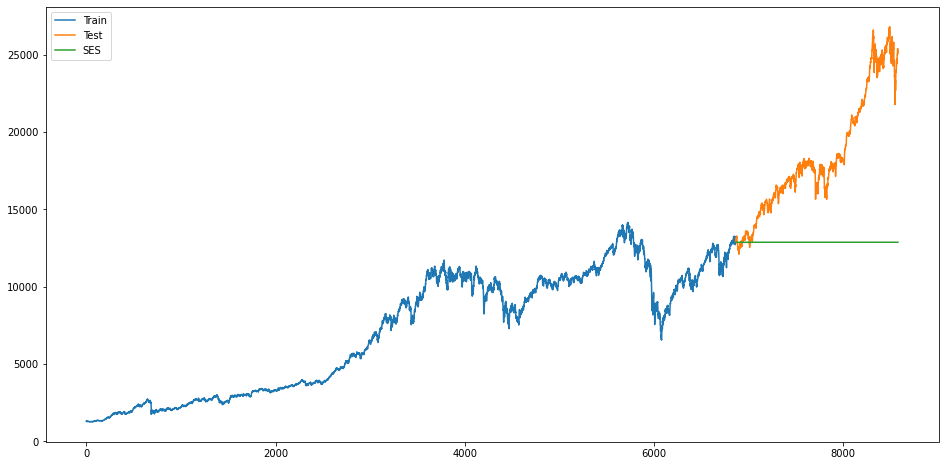

In [ ]:
#exponential smoothing means having momentum
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SES))
print(rms)

6772.816295647129


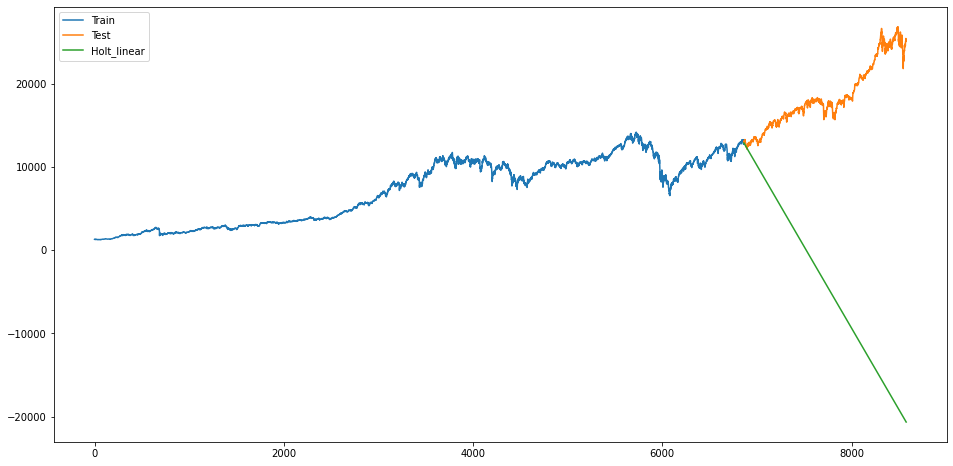

In [ ]:
#这个是hot-lineared
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_linear))
print(rms)

26044.775085360994


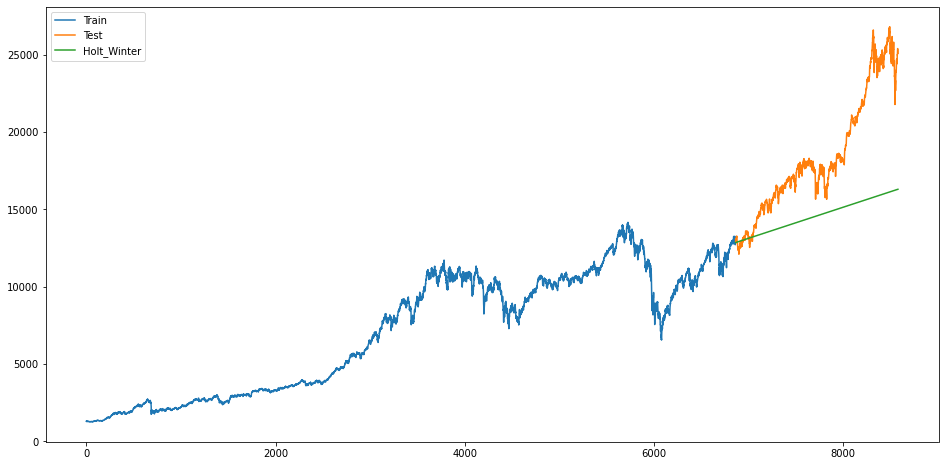

In [ ]:
#这个是hot-winter
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
print(rms)

4844.890969918048


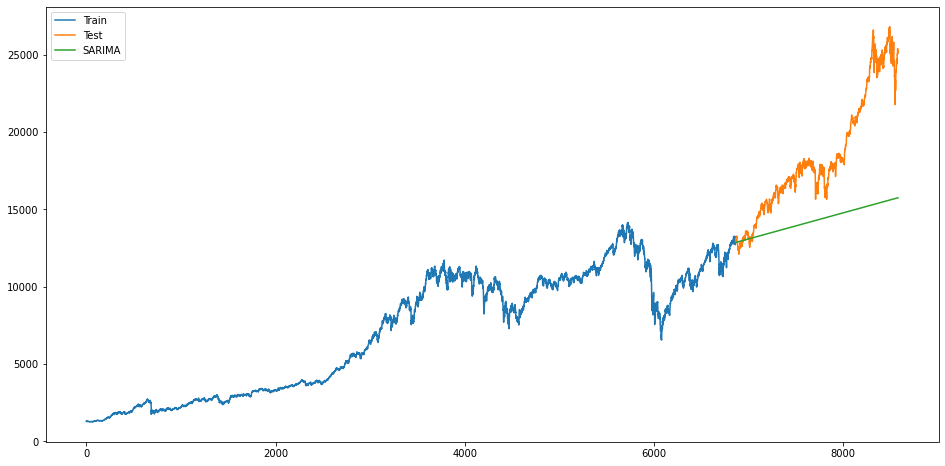

In [ ]:
#这个是个bad demo
import statsmodels.api as sm

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['Close'], order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.forecast(len(test))
#y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SARIMA))
print(rms)

5152.818984919231
